In [ ]:
cd ../..

In [ ]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset

print(tf.__version__)

In [ ]:
# datasets = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = ["BasicMotions", "NATOPS", "UWaveGestureLibrary"]
methods = {
    # Basic experimentos
    # "43b17a2e4f21097540adf8600402c5bd32fa60d6": "subspace_gknn_gch",
    # "37a3f06c077321b95960769282152427a7ee48ae": "subspace_gknn_ich", 
    # "86df14d56b66fecfb65d5805107dfe10961ecae9": "subspace_iknn_gch",     
    # "4f40e39bfe0d3da692b5571d87f7ec915c42eba2": "subspace_iknn_ich", 
    
    # Basic experiments only gknn but with lower gamma (0.125)
    # "4d1faa458bab2b8c6ee14d59b824557fcc80d8e3": "subspace_gknn_gch_gamma0125", 
    # "93c0b5f0630a5dbf5d0377a4f3ff03b6868cbda1": "subspace_iknn_gch_gamma0125", 
    
    # Basic experiments New IoS 
    # "e54dcb25b02132166a719885cad2695540450ee6": "subspace_gknn_gch_ios",
    # "9cdb2fb25d7c664d60da7aa23b4c2c0f9ec9548c": "subspace_gknn_ich_ios",
    # "8c29354f168b9852a05523a7c26ab0f4acb30e9b": "subspace_iknn_gch_ios",
    # "b93fe63854fe36f62900cbcae1c00ad499d41f74": "subspace_iknn_ich_ios",
    
    # Sub-SpaCE v2 para fine tuning con optimizacion con canales independientes
    "316686353c28547589d494bcc886c8334329b14e": "subspace_gknn_gch",
    "0f31693cb3d17afd3d67191e82e2bca887075ee6": "subspace_gknn_gch_moremut",
    "76f8a8271b7ba6d171b7383bce7bbf4d9286d78c": "subspace_gknn_gch_moreit",
    "bba03e82f6c718e1466a06087dd99606de229b40": "subspace_gknn_ich",
    "a246def090b506ff8ba41e861e0464493233b9d1": "subspace_gknn_ich_moremut",
    "d3b12b6ac5e2ab4e68901859273a55edb14d5590": "subspace_gknn_ich_moreit",
    "cfbb6793595875fa49b7becafefa2ff2df33a2f6": "subspace_gknn_cch",
    "e4a8da55a30853287350d3540873bcb91cb50b70": "subspace_gknn_cch_moremut",
    "fe0be96f08c5d37950f7ae2c50d7f81fc050c185": "subspace_gknn_cch_moreit"
}

# Get results

In [40]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculator, possible_nuns, desired_classes = load_dataset_for_eval(dataset)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculator
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods,
        data_tuple, original_classes, model, outlier_calculator, possible_nuns
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for BasicMotions
0f31693cb3d17afd3d67191e82e2bca887075ee6


100%|██████████| 40/40 [00:02<00:00, 18.47it/s]


316686353c28547589d494bcc886c8334329b14e


100%|██████████| 40/40 [00:01<00:00, 20.92it/s]


76f8a8271b7ba6d171b7383bce7bbf4d9286d78c


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


a246def090b506ff8ba41e861e0464493233b9d1


100%|██████████| 40/40 [00:01<00:00, 20.90it/s]


bba03e82f6c718e1466a06087dd99606de229b40


100%|██████████| 40/40 [00:01<00:00, 20.81it/s]


cfbb6793595875fa49b7becafefa2ff2df33a2f6


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


d3b12b6ac5e2ab4e68901859273a55edb14d5590


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


e4a8da55a30853287350d3540873bcb91cb50b70


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


fe0be96f08c5d37950f7ae2c50d7f81fc050c185


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


Calculating metrics for NATOPS
0f31693cb3d17afd3d67191e82e2bca887075ee6


100%|██████████| 100/100 [00:04<00:00, 20.96it/s]


316686353c28547589d494bcc886c8334329b14e


100%|██████████| 100/100 [00:04<00:00, 21.09it/s]


76f8a8271b7ba6d171b7383bce7bbf4d9286d78c


100%|██████████| 100/100 [00:04<00:00, 20.91it/s]


a246def090b506ff8ba41e861e0464493233b9d1


100%|██████████| 100/100 [00:04<00:00, 20.98it/s]


bba03e82f6c718e1466a06087dd99606de229b40


100%|██████████| 100/100 [00:04<00:00, 21.05it/s]


cfbb6793595875fa49b7becafefa2ff2df33a2f6


100%|██████████| 100/100 [00:05<00:00, 19.06it/s]


d3b12b6ac5e2ab4e68901859273a55edb14d5590


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


e4a8da55a30853287350d3540873bcb91cb50b70


100%|██████████| 100/100 [00:06<00:00, 16.63it/s]


fe0be96f08c5d37950f7ae2c50d7f81fc050c185


100%|██████████| 100/100 [00:05<00:00, 18.91it/s]


Calculating metrics for UWaveGestureLibrary
0f31693cb3d17afd3d67191e82e2bca887075ee6


100%|██████████| 100/100 [00:05<00:00, 19.45it/s]


316686353c28547589d494bcc886c8334329b14e


100%|██████████| 100/100 [00:05<00:00, 19.41it/s]


76f8a8271b7ba6d171b7383bce7bbf4d9286d78c


100%|██████████| 100/100 [00:05<00:00, 17.55it/s]


a246def090b506ff8ba41e861e0464493233b9d1


100%|██████████| 100/100 [00:05<00:00, 18.79it/s]


bba03e82f6c718e1466a06087dd99606de229b40


100%|██████████| 100/100 [00:05<00:00, 19.09it/s]


cfbb6793595875fa49b7becafefa2ff2df33a2f6


100%|██████████| 100/100 [00:05<00:00, 19.93it/s]


d3b12b6ac5e2ab4e68901859273a55edb14d5590


100%|██████████| 100/100 [00:04<00:00, 20.34it/s]


e4a8da55a30853287350d3540873bcb91cb50b70


100%|██████████| 100/100 [00:04<00:00, 20.45it/s]


fe0be96f08c5d37950f7ae2c50d7f81fc050c185


100%|██████████| 100/100 [00:04<00:00, 20.64it/s]


In [41]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

BasicMotions


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch_moremut,19.5 ± 11.69,270.15 ± 124.87,0.45 ± 0.21,856.04 ± 753.29,71.19 ± 50.95,0.73 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.26 ± 0.17,0.01 ± 0.02,10.65 ± 4.61,0.04 ± 0.02,24.67 ± 6.32
1,subspace_gknn_gch,19.5 ± 11.69,259.98 ± 128.55,0.43 ± 0.21,852.45 ± 719.95,72.26 ± 50.97,0.75 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.26 ± 0.16,0.01 ± 0.02,15.75 ± 6.61,0.05 ± 0.02,32.69 ± 8.59
2,subspace_gknn_gch_moreit,19.5 ± 11.69,242.72 ± 111.42,0.4 ± 0.19,810.76 ± 684.42,70.76 ± 50.14,0.74 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.17,0.01 ± 0.02,16.95 ± 6.36,0.06 ± 0.02,45.94 ± 8.74
3,subspace_gknn_ich_moremut,19.5 ± 11.69,296.1 ± 131.98,0.49 ± 0.22,989.3 ± 860.02,76.85 ± 54.61,0.81 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.16,0.02 ± 0.03,18.35 ± 6.41,0.06 ± 0.02,27.15 ± 7.27
4,subspace_gknn_ich,19.5 ± 11.69,286.65 ± 144.25,0.48 ± 0.24,957.01 ± 880.06,75.56 ± 54.76,0.81 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.29 ± 0.17,0.02 ± 0.03,34.62 ± 8.57,0.12 ± 0.03,35.18 ± 8.62
5,subspace_gknn_cch,19.5 ± 11.69,252.7 ± 118.78,0.42 ± 0.2,834.92 ± 704.23,71.41 ± 50.47,0.78 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.17,0.01 ± 0.02,16.15 ± 5.58,0.05 ± 0.02,33.85 ± 8.46
6,subspace_gknn_ich_moreit,19.5 ± 11.69,279.62 ± 123.25,0.47 ± 0.21,940.57 ± 820.96,75.41 ± 53.43,0.82 ± 0.06,1.0 ± 0.0,1.0 ± 0.0,0.28 ± 0.16,0.01 ± 0.03,30.68 ± 9.54,0.1 ± 0.03,48.9 ± 10.25
7,subspace_gknn_cch_moremut,19.5 ± 11.69,264.35 ± 123.72,0.44 ± 0.21,851.66 ± 726.55,71.28 ± 50.22,0.77 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.17,0.01 ± 0.02,10.95 ± 4.65,0.04 ± 0.02,25.21 ± 5.84
8,subspace_gknn_cch_moreit,19.5 ± 11.69,247.65 ± 117.81,0.41 ± 0.2,822.77 ± 697.21,71.2 ± 49.62,0.78 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.28 ± 0.17,0.01 ± 0.02,15.15 ± 5.81,0.05 ± 0.02,45.76 ± 8.3


NATOPS


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch_moremut,87.18 ± 53.72,326.88 ± 156.91,0.27 ± 0.13,161.85 ± 133.92,10.63 ± 6.9,0.9 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.03 ± 0.05,24.48 ± 3.38,0.04 ± 0.01,26.62 ± 5.3
1,subspace_gknn_gch,87.18 ± 53.72,327.12 ± 157.61,0.27 ± 0.13,163.21 ± 136.7,10.65 ± 6.98,0.9 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.18,0.03 ± 0.04,25.2 ± 5.26,0.04 ± 0.01,34.6 ± 8.69
2,subspace_gknn_gch_moreit,87.18 ± 53.72,323.28 ± 157.34,0.26 ± 0.13,161.72 ± 136.09,10.61 ± 6.97,0.9 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.03 ± 0.05,25.44 ± 6.67,0.04 ± 0.01,49.92 ± 9.89
3,subspace_gknn_ich_moremut,87.18 ± 53.72,359.36 ± 184.2,0.29 ± 0.15,166.2 ± 139.03,10.62 ± 6.83,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.64 ± 0.21,0.06 ± 0.07,44.37 ± 11.85,0.07 ± 0.02,31.8 ± 8.63
4,subspace_gknn_ich,87.18 ± 53.72,384.03 ± 178.29,0.31 ± 0.15,161.1 ± 132.18,10.37 ± 6.52,0.94 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.66 ± 0.23,0.08 ± 0.11,87.31 ± 28.31,0.14 ± 0.05,40.1 ± 11.96
5,subspace_gknn_cch,87.18 ± 53.72,319.92 ± 152.44,0.26 ± 0.12,158.56 ± 131.49,10.52 ± 6.76,0.96 ± 0.04,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.02 ± 0.04,25.44 ± 5.74,0.04 ± 0.01,36.53 ± 9.67
6,subspace_gknn_ich_moreit,87.18 ± 53.72,372.68 ± 169.58,0.3 ± 0.14,165.38 ± 133.37,10.58 ± 6.65,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.64 ± 0.22,0.06 ± 0.08,71.24 ± 21.5,0.12 ± 0.04,56.64 ± 11.43
7,subspace_gknn_cch_moremut,87.18 ± 53.72,322.35 ± 155.95,0.26 ± 0.13,161.01 ± 131.49,10.68 ± 6.79,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.02 ± 0.04,24.13 ± 4.48,0.04 ± 0.01,28.4 ± 5.91
8,subspace_gknn_cch_moreit,87.18 ± 53.72,317.09 ± 154.16,0.26 ± 0.13,160.39 ± 132.98,10.64 ± 6.88,0.96 ± 0.03,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.19,0.02 ± 0.04,25.07 ± 5.15,0.04 ± 0.01,51.9 ± 9.53


UWaveGestureLibrary


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch_moremut,159.0 ± 87.23,311.19 ± 126.64,0.33 ± 0.13,281.16 ± 120.23,19.17 ± 5.08,0.87 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.16,0.04 ± 0.06,7.11 ± 2.82,0.02 ± 0.01,49.73 ± 12.56
1,subspace_gknn_gch,159.0 ± 87.23,307.44 ± 138.13,0.33 ± 0.15,272.85 ± 126.03,18.65 ± 5.39,0.85 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.71 ± 0.16,0.06 ± 0.07,11.13 ± 5.93,0.02 ± 0.01,58.68 ± 14.47
2,subspace_gknn_gch_moreit,159.0 ± 87.23,301.2 ± 127.92,0.32 ± 0.14,270.08 ± 123.09,18.63 ± 5.3,0.86 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.7 ± 0.16,0.04 ± 0.07,9.09 ± 4.08,0.02 ± 0.01,77.71 ± 13.65
3,subspace_gknn_ich_moremut,159.0 ± 87.23,314.72 ± 138.72,0.33 ± 0.15,289.74 ± 130.49,19.46 ± 5.33,0.9 ± 0.06,1.0 ± 0.0,1.0 ± 0.0,0.7 ± 0.16,0.05 ± 0.08,9.24 ± 4.93,0.02 ± 0.01,52.36 ± 12.77
4,subspace_gknn_ich,159.0 ± 87.23,347.44 ± 158.7,0.37 ± 0.17,301.55 ± 140.92,19.51 ± 5.55,0.88 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.79 ± 0.17,0.13 ± 0.13,26.49 ± 14.02,0.06 ± 0.03,60.36 ± 14.76
5,subspace_gknn_cch,159.0 ± 87.23,319.16 ± 142.71,0.34 ± 0.15,282.65 ± 131.26,18.96 ± 5.5,0.87 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.7 ± 0.15,0.05 ± 0.08,12.39 ± 7.16,0.03 ± 0.02,59.45 ± 14.79
6,subspace_gknn_ich_moreit,159.0 ± 87.23,319.73 ± 140.13,0.34 ± 0.15,289.93 ± 128.76,19.35 ± 5.25,0.9 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.7 ± 0.16,0.05 ± 0.07,11.86 ± 7.3,0.03 ± 0.02,83.66 ± 16.73
7,subspace_gknn_cch_moremut,159.0 ± 87.23,314.31 ± 135.75,0.33 ± 0.14,287.94 ± 126.98,19.44 ± 5.27,0.89 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.68 ± 0.15,0.03 ± 0.05,7.25 ± 2.81,0.02 ± 0.01,50.06 ± 11.37
8,subspace_gknn_cch_moreit,159.0 ± 87.23,309.97 ± 135.06,0.33 ± 0.14,277.6 ± 122.09,18.9 ± 5.19,0.87 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.69 ± 0.16,0.04 ± 0.07,9.58 ± 4.47,0.02 ± 0.01,80.5 ± 14.03


In [42]:
columns = ["nchanges", "L2", "valid", "increase_outlier_score", "subsequences", "times"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

BasicMotions


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch,252.7 ± 118.78,71.41 ± 50.47,1.0 ± 0.0,0.01 ± 0.02,16.15 ± 5.58,33.85 ± 8.46
subspace_gknn_cch_moreit,247.65 ± 117.81,71.2 ± 49.62,1.0 ± 0.0,0.01 ± 0.02,15.15 ± 5.81,45.76 ± 8.3
subspace_gknn_cch_moremut,264.35 ± 123.72,71.28 ± 50.22,1.0 ± 0.0,0.01 ± 0.02,10.95 ± 4.65,25.21 ± 5.84
subspace_gknn_gch,259.98 ± 128.55,72.26 ± 50.97,1.0 ± 0.0,0.01 ± 0.02,15.75 ± 6.61,32.69 ± 8.59
subspace_gknn_gch_moreit,242.72 ± 111.42,70.76 ± 50.14,1.0 ± 0.0,0.01 ± 0.02,16.95 ± 6.36,45.94 ± 8.74
subspace_gknn_gch_moremut,270.15 ± 124.87,71.19 ± 50.95,1.0 ± 0.0,0.01 ± 0.02,10.65 ± 4.61,24.67 ± 6.32
subspace_gknn_ich,286.65 ± 144.25,75.56 ± 54.76,1.0 ± 0.0,0.02 ± 0.03,34.62 ± 8.57,35.18 ± 8.62
subspace_gknn_ich_moreit,279.62 ± 123.25,75.41 ± 53.43,1.0 ± 0.0,0.01 ± 0.03,30.68 ± 9.54,48.9 ± 10.25
subspace_gknn_ich_moremut,296.1 ± 131.98,76.85 ± 54.61,1.0 ± 0.0,0.02 ± 0.03,18.35 ± 6.41,27.15 ± 7.27


NATOPS


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch,319.92 ± 152.44,10.52 ± 6.76,1.0 ± 0.0,0.02 ± 0.04,25.44 ± 5.74,36.53 ± 9.67
subspace_gknn_cch_moreit,317.09 ± 154.16,10.64 ± 6.88,1.0 ± 0.0,0.02 ± 0.04,25.07 ± 5.15,51.9 ± 9.53
subspace_gknn_cch_moremut,322.35 ± 155.95,10.68 ± 6.79,1.0 ± 0.0,0.02 ± 0.04,24.13 ± 4.48,28.4 ± 5.91
subspace_gknn_gch,327.12 ± 157.61,10.65 ± 6.98,1.0 ± 0.0,0.03 ± 0.04,25.2 ± 5.26,34.6 ± 8.69
subspace_gknn_gch_moreit,323.28 ± 157.34,10.61 ± 6.97,1.0 ± 0.0,0.03 ± 0.05,25.44 ± 6.67,49.92 ± 9.89
subspace_gknn_gch_moremut,326.88 ± 156.91,10.63 ± 6.9,1.0 ± 0.0,0.03 ± 0.05,24.48 ± 3.38,26.62 ± 5.3
subspace_gknn_ich,384.03 ± 178.29,10.37 ± 6.52,1.0 ± 0.0,0.08 ± 0.11,87.31 ± 28.31,40.1 ± 11.96
subspace_gknn_ich_moreit,372.68 ± 169.58,10.58 ± 6.65,1.0 ± 0.0,0.06 ± 0.08,71.24 ± 21.5,56.64 ± 11.43
subspace_gknn_ich_moremut,359.36 ± 184.2,10.62 ± 6.83,1.0 ± 0.0,0.06 ± 0.07,44.37 ± 11.85,31.8 ± 8.63


UWaveGestureLibrary


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_cch,319.16 ± 142.71,18.96 ± 5.5,1.0 ± 0.0,0.05 ± 0.08,12.39 ± 7.16,59.45 ± 14.79
subspace_gknn_cch_moreit,309.97 ± 135.06,18.9 ± 5.19,1.0 ± 0.0,0.04 ± 0.07,9.58 ± 4.47,80.5 ± 14.03
subspace_gknn_cch_moremut,314.31 ± 135.75,19.44 ± 5.27,1.0 ± 0.0,0.03 ± 0.05,7.25 ± 2.81,50.06 ± 11.37
subspace_gknn_gch,307.44 ± 138.13,18.65 ± 5.39,1.0 ± 0.0,0.06 ± 0.07,11.13 ± 5.93,58.68 ± 14.47
subspace_gknn_gch_moreit,301.2 ± 127.92,18.63 ± 5.3,1.0 ± 0.0,0.04 ± 0.07,9.09 ± 4.08,77.71 ± 13.65
subspace_gknn_gch_moremut,311.19 ± 126.64,19.17 ± 5.08,1.0 ± 0.0,0.04 ± 0.06,7.11 ± 2.82,49.73 ± 12.56
subspace_gknn_ich,347.44 ± 158.7,19.51 ± 5.55,1.0 ± 0.0,0.13 ± 0.13,26.49 ± 14.02,60.36 ± 14.76
subspace_gknn_ich_moreit,319.73 ± 140.13,19.35 ± 5.25,1.0 ± 0.0,0.05 ± 0.07,11.86 ± 7.3,83.66 ± 16.73
subspace_gknn_ich_moremut,314.72 ± 138.72,19.46 ± 5.33,1.0 ± 0.0,0.05 ± 0.08,9.24 ± 4.93,52.36 ± 12.77


# Counterfactual visualization

In [7]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(18, 12))
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.1, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            # Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')
            found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['NUN', 'x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.show()



In [29]:
dataset = "UWaveGestureLibrary"
# methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
common_index_instance = 14

Sample 54: true class [1], x_orig predicted 1, desired_class  6


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_17108\2187854086.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


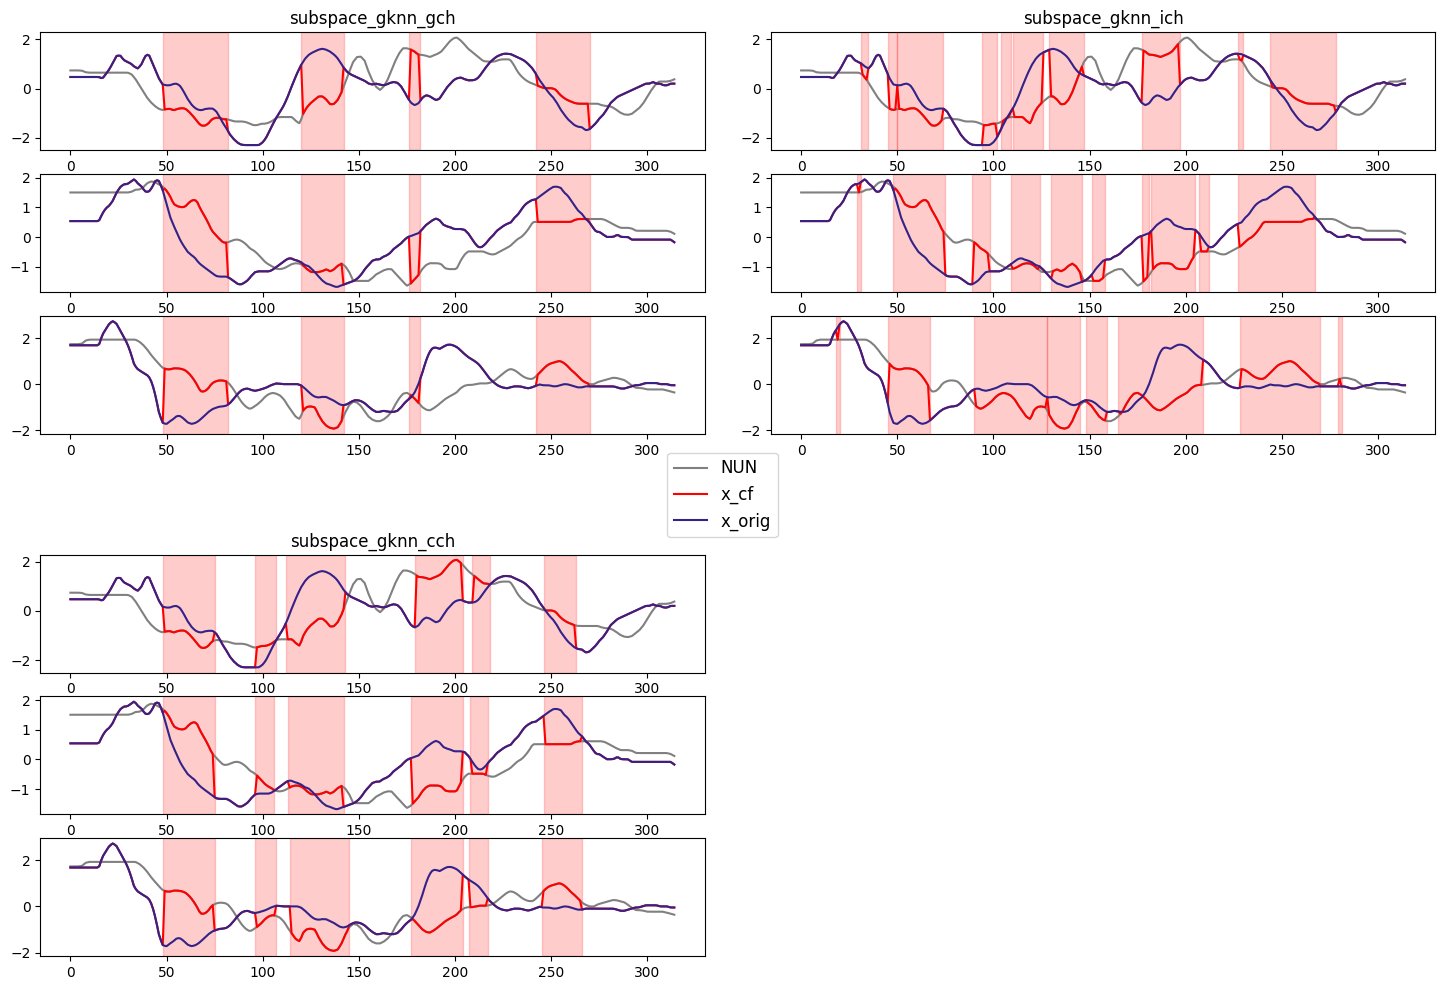

In [30]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn", "iknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = methods_cfs_dict[dataset]
sol_cfs_methods = {method: sol_cfs[common_index_instance]['cf'] for method, sol_cfs in sol_cfs_methods.items()}

# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods)


In [ ]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)
